In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("googleplaystore.csv")

In [3]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [11]:
data.shape

(10841, 13)

In [13]:
total=data.isnull().sum().sort_values(ascending=False)#sıralamanın küçükten büyüge yapılacağını belirtir
percent=(data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data.head()

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092


In [15]:
data.dropna(how="any",inplace=True)#how hangi değerin atılacağını söyler
                                  #any herhangi bir degerin atılacagını belirtir
                                  #eksik degerlere sahip satırları veya sutunları kaldırmak kullanılır DROPNa
                                  #satırları veya sutunları kaldırmak kullanılır DROP

Text(0.5, 1.0, 'Rayting frekans')

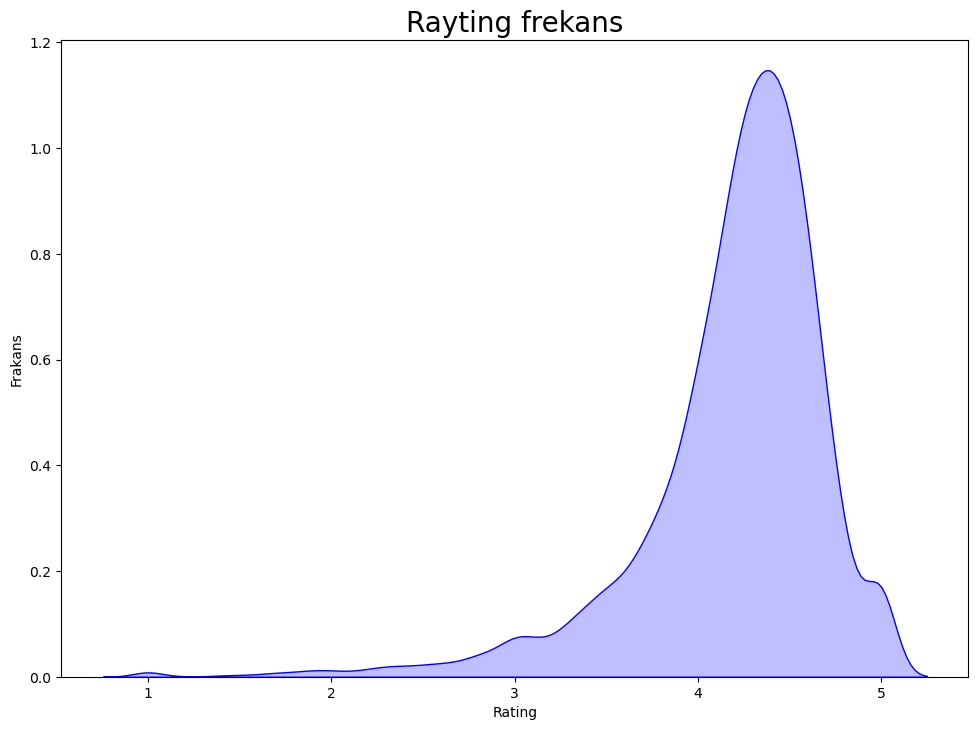

In [17]:
plt.rcParams["figure.figsize"]=11.7,8.27
g=sns.kdeplot(data.Rating,color="Blue",shade="True")#renk ve görselleştirme ile ilgilidir renk tonları ve gölgeleri ifade eder SHADE
g.set_xlabel("Rating")
g.set_ylabel("Frakans")
plt.title("Rayting frekans",size=20)

In [19]:
print(len(data["Category"].unique()),"categories")

33 categories


In [21]:
data["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

Text(0.5, 1.0, 'kategori sıralaması')

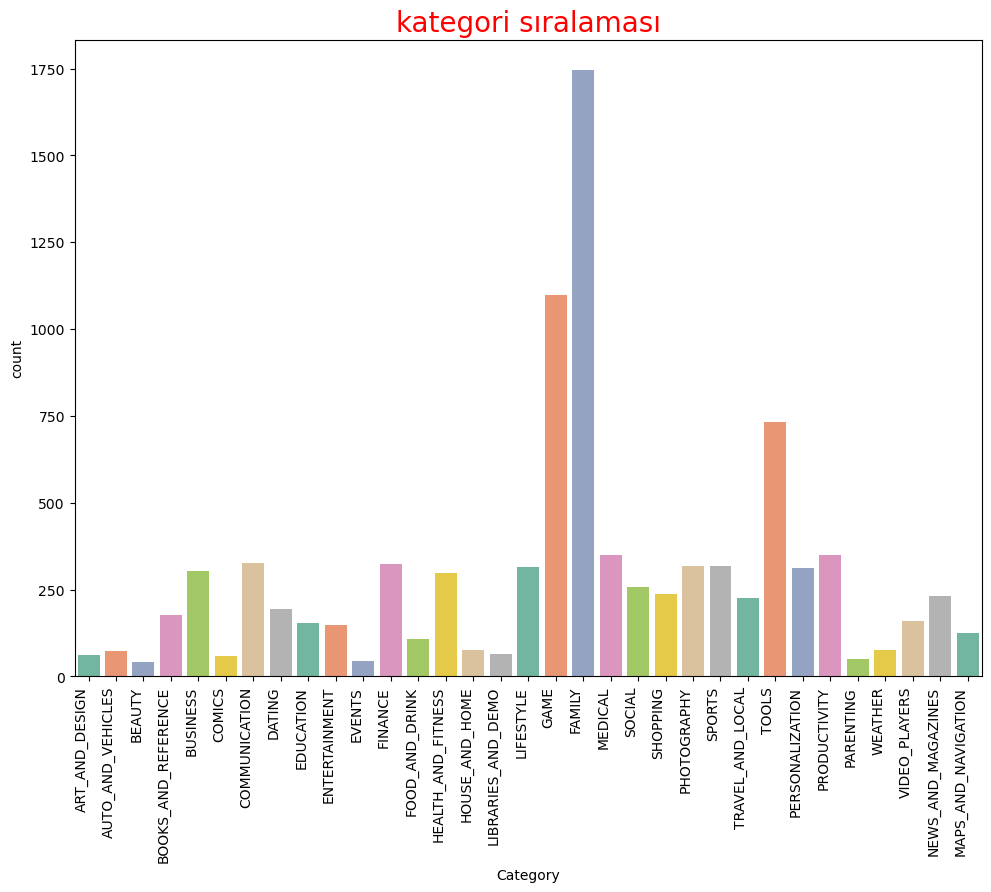

In [23]:
g=sns.countplot(x="Category",data=data,palette="Set2")#palette sutunların rengini ayarlar Set1 Set2
g.set_xticklabels(g.get_xticklabels(),rotation=90,ha="right")#rotation dik olmasını sağlar #Ha yönünü ve hizalamasını ayarlar
g
plt.title("kategori sıralaması",size=20,color="red")

Text(0.5, 1.0, 'kategory  reyting grafiği')

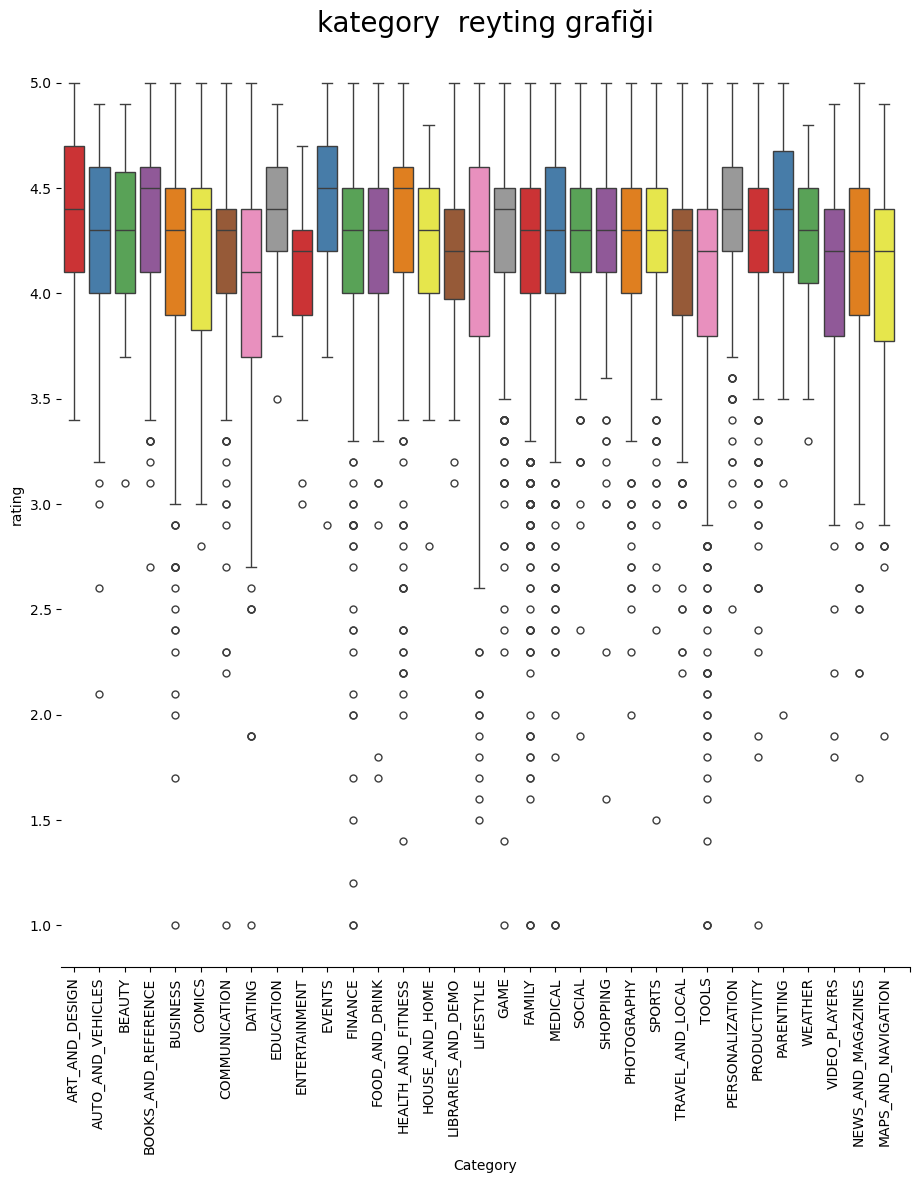

In [25]:
g=sns.catplot(x="Category",y="Rating",data=data,kind="box",height=10,palette="Set1")
g.despine(left=True)#Sola yaslama
g.set_xticklabels(rotation=90)
g.set(xticks=range(0,34))
g=g.set_xlabels("Category")
g=g.set_ylabels("rating")
plt.title("kategory  reyting grafiği",size=20)

In [27]:
data["Reviews"].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [29]:
data["Reviews"]=data["Reviews"].apply(lambda x:int(x))

In [31]:
data.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

Text(0.5, 1.0, 'Reviews frekans')

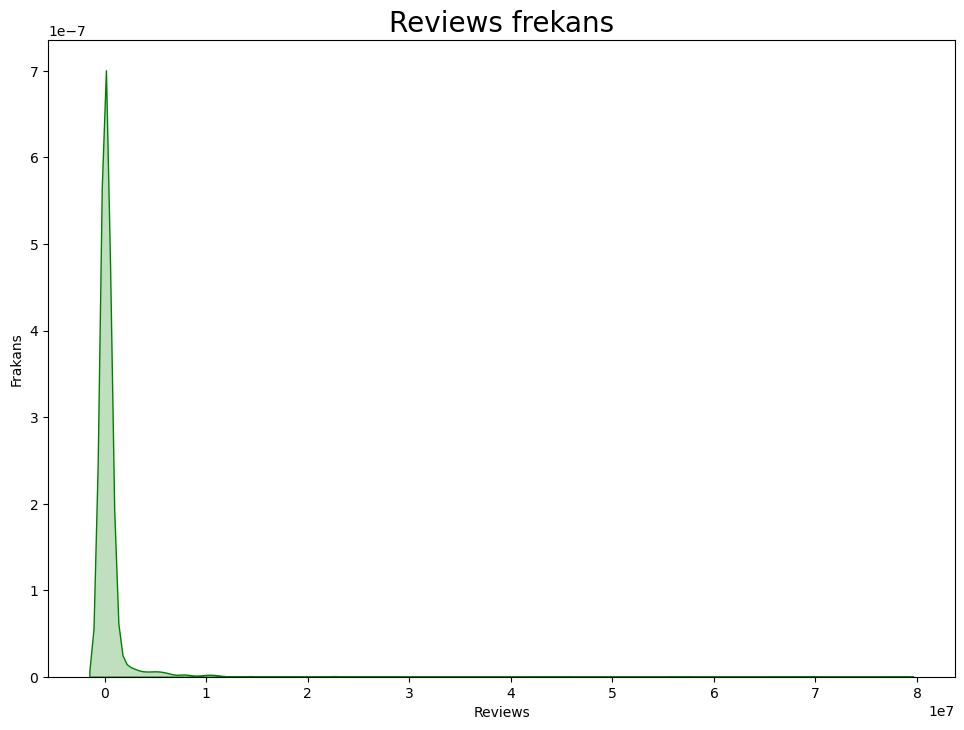

In [33]:
plt.rcParams["figure.figsize"]=11.7,8.27
g=sns.kdeplot(data.Reviews,color="Green",shade="True")#renk ve görselleştirme ile ilgilidir renk tonları ve gölgeleri ifade eder SHADE
g.set_xlabel("Reviews")
g.set_ylabel("Frakans")
plt.title("Reviews frekans",size=20)

In [35]:
data[data.Reviews>5000000].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,Varies with device,"500,000,000+",Free,0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
351,Opera Mini - fast web browser,COMMUNICATION,4.5,5149854,Varies with device,"100,000,000+",Free,0,Everyone,Communication,"July 19, 2018",Varies with device,Varies with device


In [37]:
len(data[data.Reviews>5000000])

230

<Figure size 1000x1000 with 0 Axes>

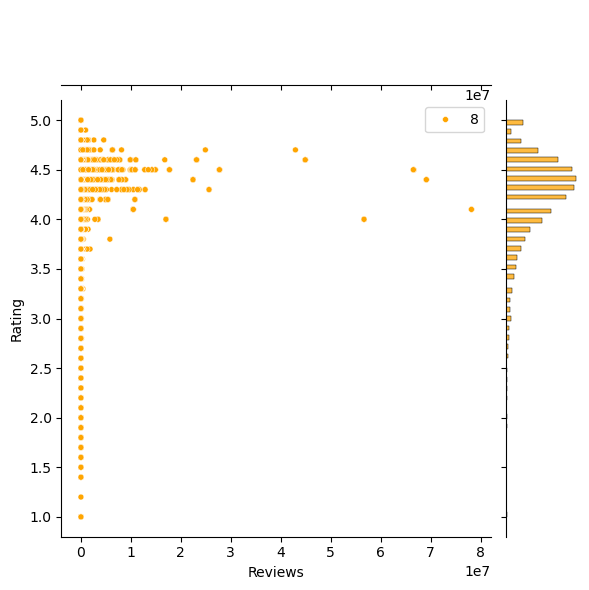

In [39]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x="Reviews",y="Rating",color="orange",data=data,size=8)

Text(0.5, 1.0, 'rating reviews')

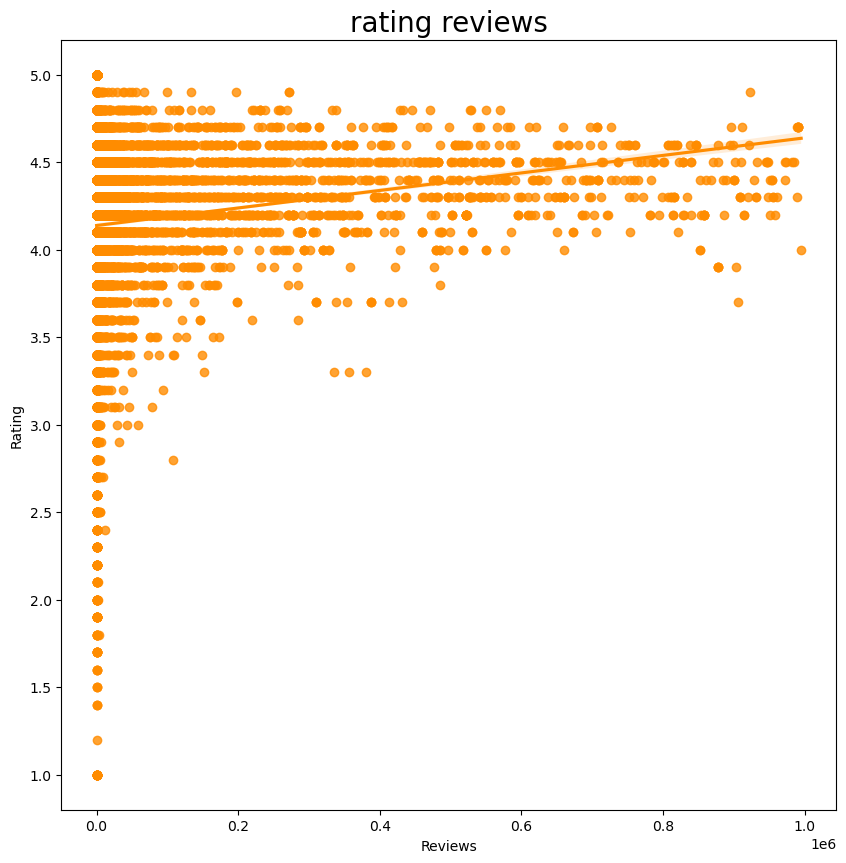

In [40]:
plt.figure(figsize=(10,10))
sns.regplot(x="Reviews",y="Rating",color="darkorange",data=data[data["Reviews"]<1000000])
plt.title("rating reviews",size=20)

In [41]:
data["Size"].head()

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object

In [42]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [43]:
len(data[data.Size=="Varies with device"])

1637

In [44]:
data["Size"].replace("Varies with device",np.nan,inplace=True)

In [45]:
data.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', nan, '9.4M', '15M', '10M', '1.2M', '26M', '8.0M', '7.9M',
       '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M', '8.6M', '2.4M',
       '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M', '8.9M', '3.9M',
       '2.9M', '38M', '32M', '5.4M', '18M', '1.1M', '2.2M', '4.5M',
       '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M', '7.1M', '22M',
       '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M', '5.9M', '13M',
       '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M', '42M', '9.1M',
       '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M',
       '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M',
       '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M', '3.7M',
       '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M', '3.0M',
       '7.2M', 

In [46]:
data.Size=(data.Size.replace(r'[kM]+$', '',regex=True).astype(float)* \
           data.Size.str.extract(r'[\d.]+([KM]+)',expand=False)
           .fillna(1)
           .replace(['k','M'],[10*3,10**6]).astype(int))

In [47]:
data["Size"].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 5.50e+06, 1.70e+07, 3.90e+07, 3.10e+07,
       4.20e+06, 2.30e+07, 6.00e+06, 6.10e+06, 4.60e+06, 9.20e+06,
       5.20e+06, 1.10e+07, 2.40e+07,      nan, 9.40e+06, 1.50e+07,
       1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06, 7.90e+06, 5.60e+07,
       5.70e+07, 3.50e+07, 5.40e+07, 2.01e+02, 3.60e+06, 5.70e+06,
       8.60e+06, 2.40e+06, 2.70e+07, 2.70e+06, 2.50e+06, 7.00e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 2.20e+07, 6.40e+06, 3.20e+06, 8.20e+06, 4.90e+06,
       9.50e+06, 5.00e+06, 5.90e+06, 1.30e+07, 7.30e+07, 6.80e+06,
       3.50e+06, 4.00e+06, 2.30e+06, 2.10e+06, 4.20e+07, 9.10e+06,
       5.50e+07, 2.30e+01, 7.30e+06, 6.50e+06, 1.50e+06, 7.50e

In [48]:
data["Size"].fillna(data.groupby("Category")["Size"].transform("mean"),inplace=True)

<Figure size 1000x1000 with 0 Axes>

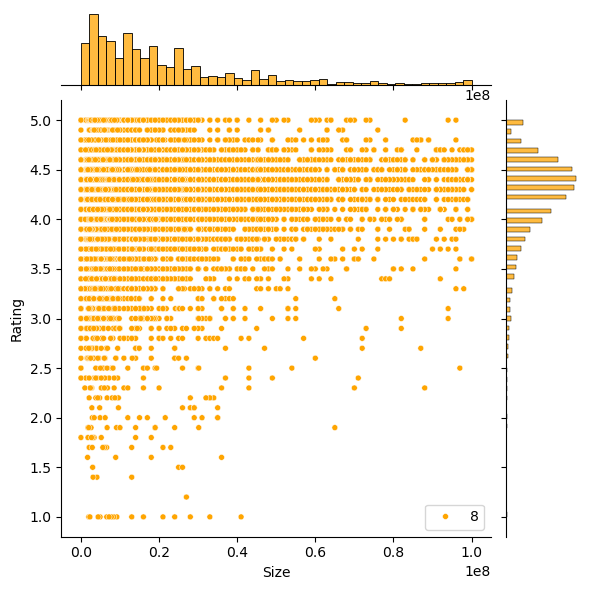

In [49]:
plt.figure(figsize=(10,10))
g=sns.jointplot(x="Size",y="Rating",color="orange",data=data,size=8)

In [50]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
data["Installs"].head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [62]:
data["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [67]:
data.Installs=data.Installs.apply(lambda x: x.replace(',',''))
data.Installs=data.Installs.apply(lambda x: x.replace('+',''))
data.Installs=data.Installs.apply(lambda x: int(x))

In [69]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [71]:
data["Installs"].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [73]:
data["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1], dtype=int64)

In [75]:
sorted_value=sorted(list(data["Installs"].unique()))

In [77]:
sorted_value

[1,
 5,
 10,
 50,
 100,
 500,
 1000,
 5000,
 10000,
 50000,
 100000,
 500000,
 1000000,
 5000000,
 10000000,
 50000000,
 100000000,
 500000000,
 1000000000]

In [79]:
data["Installs"].replace(sorted_value,range(0,len(sorted_value),1),inplace=True)

In [81]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [83]:
data.sort_values("Installs")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10697,Mu.F.O.,GAME,5.0,2,1.600000e+07,0,Paid,$0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.0,2,2.000000e+07,0,Paid,$1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,2.500000e+07,0,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
2459,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.600000e+06,1,Free,0,Everyone,Medical,"August 2, 2018",2.0,4.0 and up
10562,FK Atlantas,SPORTS,1.5,2,2.600000e+07,1,Free,0,Everyone,Sports,"February 21, 2018",1.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,1.241000e+07,18,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
464,Hangouts,COMMUNICATION,4.0,3419513,1.241000e+07,18,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917,1.916498e+07,18,Free,0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1.241000e+07,18,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


Text(0.5, 1.0, 'rating Installs')

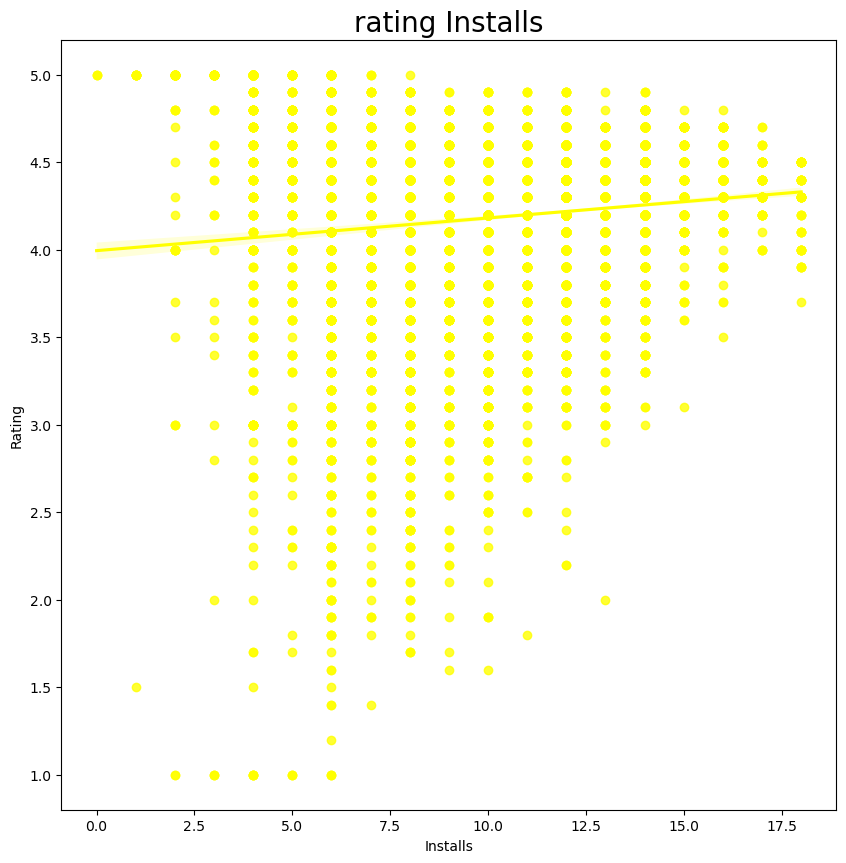

In [85]:
plt.figure(figsize=(10,10))
sns.regplot(x="Installs",y="Rating",color="yellow",data=data)
plt.title("rating Installs",size=20)

In [86]:
data["Type"].unique()

array(['Free', 'Paid'], dtype=object)

In [87]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


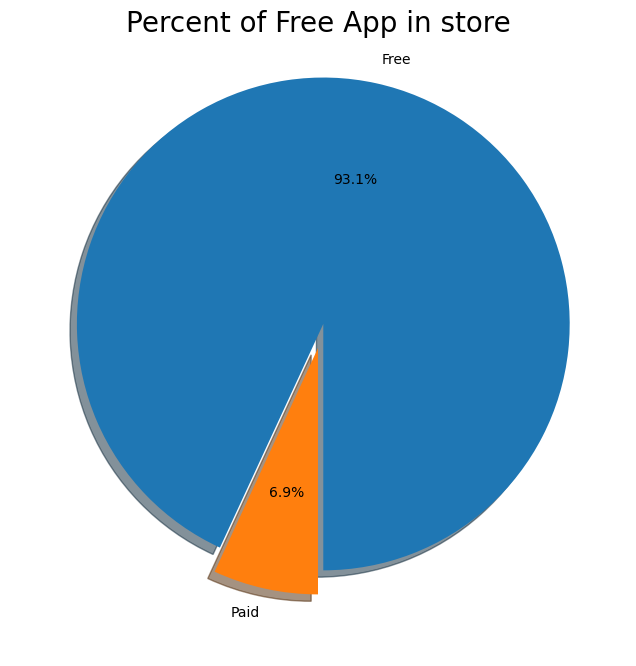

In [88]:
labels=data['Type'].value_counts(sort=True).index
sizes=data['Type'].value_counts(sort=True)

color=["palegreen","orangered"]
explode=(0.1,0)

plt.rcParams['figure.figsize']=8,8
plt.pie(sizes, explode=explode, labels=labels, 
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of Free App in store',size=20)

plt.show()       

In [89]:
data['Free']=data['Type'].map(lambda s:1 if s=='Free' else 0)
data.drop(['Type'],axis=1,inplace=True)

In [93]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [97]:
data["Free"].unique()

array([1, 0], dtype=int64)

In [99]:
data["Price"].head()

0    0
1    0
2    0
3    0
4    0
Name: Price, dtype: object

In [101]:
data["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [103]:
data["Price"].value_counts().head()

Price
0        8715
$2.99     114
$0.99     106
$4.99      70
$1.99      59
Name: count, dtype: int64

In [105]:
data['Price'] = data['Price'].apply(lambda x: x.replace('$', ''))
data['Price'] = data['Price'].apply(lambda x: float(x))

In [107]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1


In [109]:
data["Price"].describe()

count    9360.000000
mean        0.961279
std        15.821640
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [111]:
data[data["Price"]==400]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,8,400.0,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up,0


Text(0.5, 1.0, 'rating vs price')

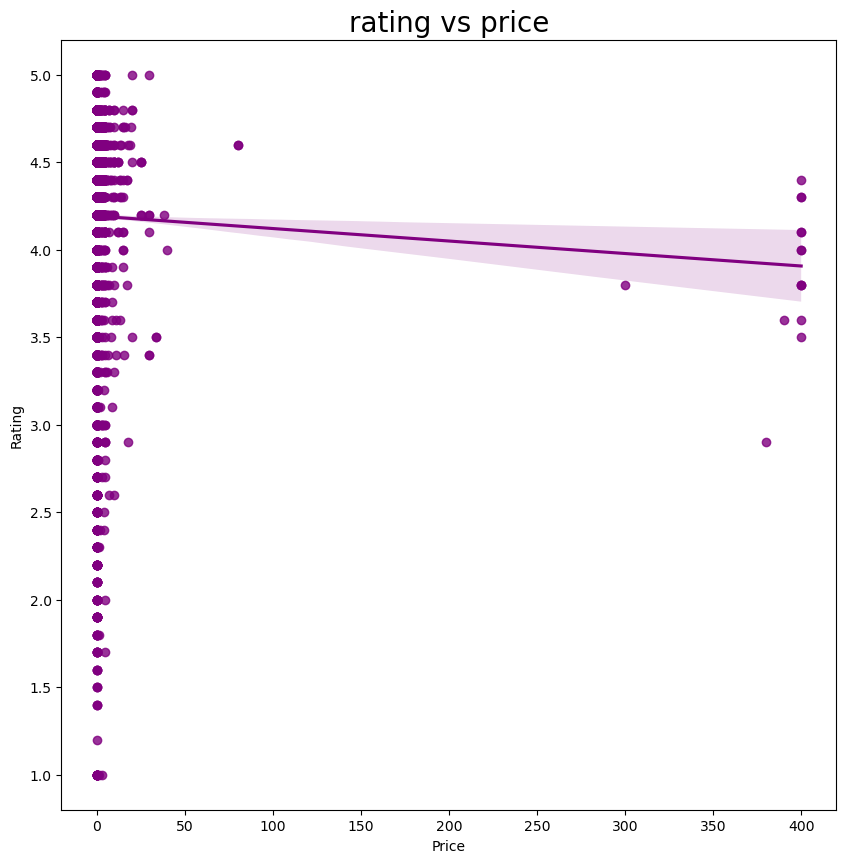

In [113]:
plt.figure(figsize=(10,10))
sns.regplot(x="Price",y="Rating",color="purple",data=data);
plt.title("rating vs price",size=20)

In [114]:
data.loc[data['Price'] == 0, 'PriceBand'] = '0 bedava'
data.loc[(data['Price'] > 0) & (data['Price'] <= 0.99), 'PriceBand'] = '1 ucuz'
data.loc[(data['Price'] > 0.99) & (data['Price'] <= 2.99), 'PriceBand'] = '2 ucuz değil'
data.loc[(data['Price'] > 2.99) & (data['Price'] <= 4.99), 'PriceBand'] = '3 normal'
data.loc[(data['Price'] > 4.99) & (data['Price'] <= 14.99), 'PriceBand'] = '4 pahalı'
data.loc[(data['Price'] > 14.99) & (data['Price'] <= 29.99), 'PriceBand'] = '5 çok pahalı'
data.loc[data['Price'] > 29.99, 'PriceBand'] = '6 nalet gelsin'

print(data)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating  Reviews     

In [115]:
data[["PriceBand","Rating"]].groupby(["PriceBand"],as_index=False).mean()

,PriceBand,Rating
0,0 bedava,4.186288
1,1 ucuz,4.300943
2,2 ucuz değil,4.292975
3,3 normal,4.250318
4,4 pahalı,4.269149
5,5 çok pahalı,4.252000
6,6 nalet gelsin,3.923810


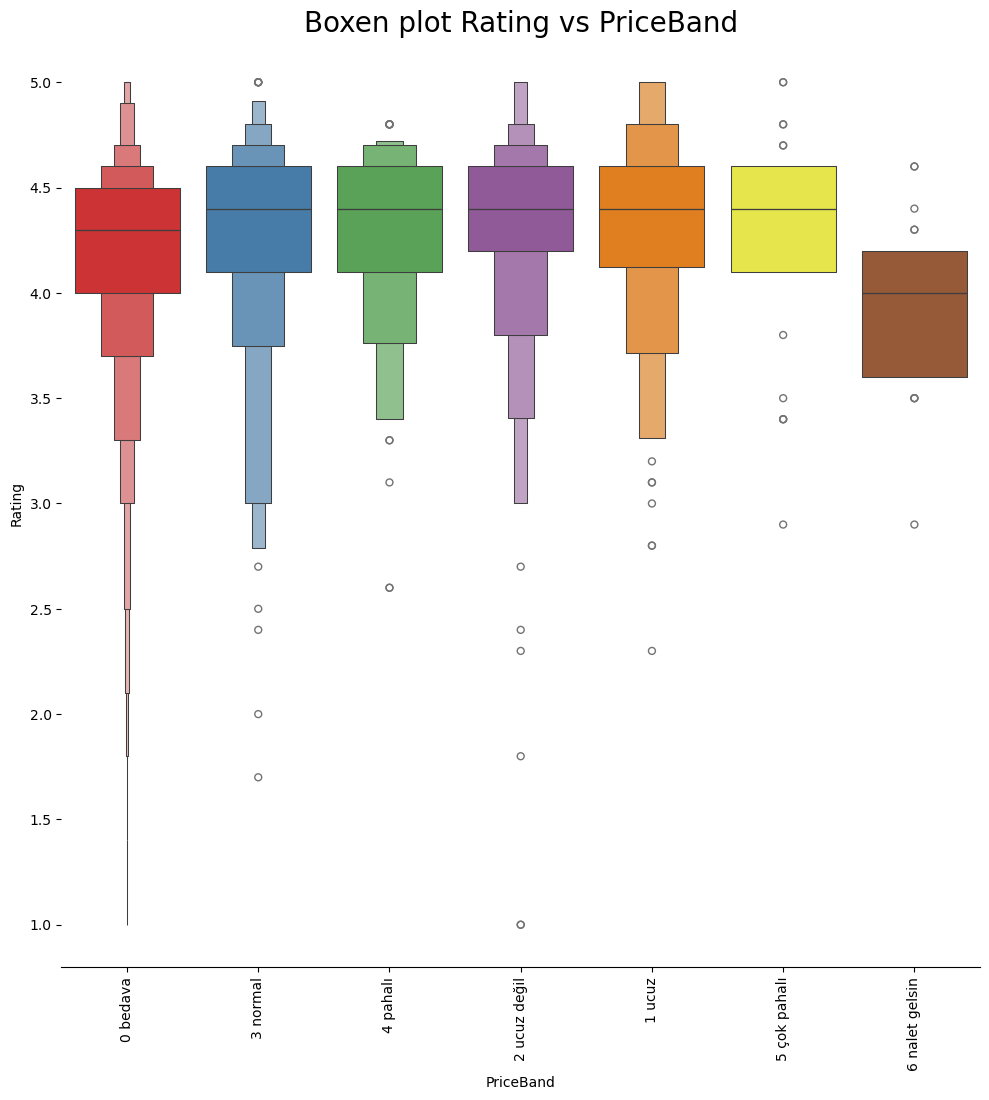

In [116]:
g=sns.catplot(x="PriceBand",y="Rating",data=data,kind="boxen",height=10,palette="Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g=g.set_ylabels("Rating")
plt.title('Boxen plot Rating vs PriceBand',size=20)
plt.show()

In [120]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 bedava
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0 bedava
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 bedava
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 bedava
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0 bedava


In [121]:
data[data["Content Rating"]=="Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand
8266,DC Universe Online Map,TOOLS,4.1,1186,6400000.0,9,0.0,Unrated,Tools,"February 27, 2012",1.3,2.3.3 and up,1,0 bedava


In [125]:
data=data[data["Content Rating"]!="Unrated"]

In [127]:
data[data["Content Rating"]=="Unrated"]

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand


In [129]:
data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+'], dtype=object)

In [131]:
data=pd.get_dummies(data,columns=["Content Rating"])

In [133]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 bedava,False,True,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0 bedava,False,True,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 bedava,False,True,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 bedava,False,False,False,False,True
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0 bedava,False,True,False,False,False


In [135]:
len(data["Genres"].unique())

115

In [137]:
data["Genres"].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [139]:
data.Genres.value_counts().head(10)

Genres
Tools            731
Entertainment    533
Education        468
Action           358
Productivity     351
Medical          350
Sports           333
Communication    328
Finance          323
Photography      317
Name: count, dtype: int64

In [141]:
data.Genres.value_counts().tail(10)

Genres
Health & Fitness;Action & Adventure    1
Health & Fitness;Education             1
Travel & Local;Action & Adventure      1
Board;Pretend Play                     1
Lifestyle;Pretend Play                 1
Parenting;Brain Games                  1
Card;Brain Games                       1
Tools;Education                        1
Entertainment;Education                1
Strategy;Creativity                    1
Name: count, dtype: int64

In [143]:
data["Genres"]=data["Genres"].str.split(";").str[0]

In [145]:
len(data["Genres"].unique())


48

In [147]:
data["Genres"].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Action',
       'Strategy', 'Puzzle', 'Sports', 'Music', 'Word', 'Racing',
       'Simulation', 'Board', 'Trivia', 'Role Playing', 'Educational',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [149]:
data["Genres"].replace("Music & Audio","Music",inplace=True)

In [151]:
len(data["Genres"].unique())


47

In [153]:
data[["Genres","Rating"]].groupby(["Genres"],as_index=False).mean().describe()

,Rating
count,47.000000
mean,4.210662
std,0.104405
min,3.970769
25%,4.132039
50%,4.198246
75%,4.282529
max,4.435556


In [155]:
data[["Genres","Rating"]].groupby(["Genres"],as_index=False).mean().sort_values("Rating").head(1)


,Genres,Rating
14,Dating,3.970769


In [157]:
data[["Genres","Rating"]].groupby(["Genres"],as_index=False).mean().sort_values("Rating").tail(1)


,Genres,Rating
18,Events,4.435556


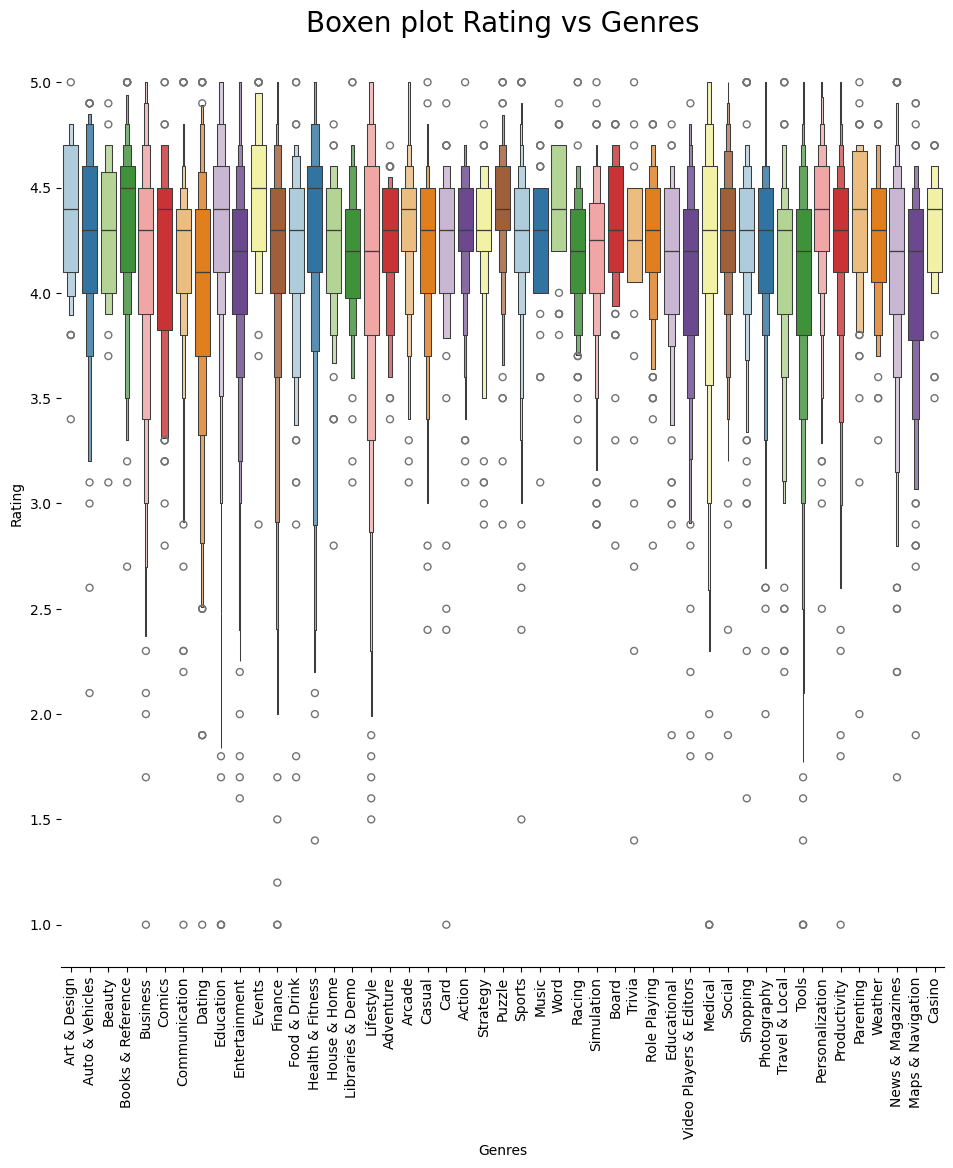

In [159]:
g=sns.catplot(x="Genres",y="Rating",data=data,kind="boxen",height=10,palette="Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g=g.set_ylabels("Rating")
plt.title('Boxen plot Rating vs Genres',size=20)
plt.show()

In [160]:
data["New"]=pd.to_datetime(data["Last Updated"])
data["New"].describe()

count                             9359
mean     2017-11-29 18:24:25.541190400
min                2010-05-21 00:00:00
25%                2017-10-09 00:00:00
50%                2018-06-01 00:00:00
75%                2018-07-24 00:00:00
max                2018-08-08 00:00:00
Name: New, dtype: object

In [161]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,New
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 bedava,False,True,False,False,False,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,1,0 bedava,False,True,False,False,False,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 bedava,False,True,False,False,False,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 bedava,False,False,False,False,True,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design,"June 20, 2018",1.1,4.4 and up,1,0 bedava,False,True,False,False,False,2018-06-20


In [162]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,Free,PriceBand,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,New
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,8,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0 bedava,False,True,False,False,False,2018-01-07
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,11,0.0,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up,1,0 bedava,False,True,False,False,False,2018-01-15
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,13,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0 bedava,False,True,False,False,False,2018-08-01
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,15,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0 bedava,False,False,False,False,True,2018-06-08
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,10,0.0,Art & Design,"June 20, 2018",1.1,4.4 and up,1,0 bedava,False,True,False,False,False,2018-06-20


In [167]:
data["New"].max()

Timestamp('2018-08-08 00:00:00')

In [169]:
data["New"][0]-data["New"].max()

Timedelta('-213 days +00:00:00')